# HW 2



### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/admissions.csv"
df_raw = pd.read_csv(url)
df_raw.head(5)

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
len(df_raw)

400

Answer: 400

#### Question 2. Create a summary table

In [4]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because range of GRE scores is significantly more than that of GPA.

#### Question 4. Drop data points with missing data


In [5]:
df_raw.dropna(inplace = True)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [6]:
len(df_raw) #3 observations are dropped

397

#### Question 6. Create box plots for GRE and GPA

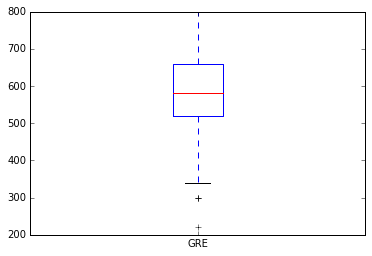

In [7]:
#boxplot 1
plt.boxplot([df_raw.gre])
plt.xticks([1],['GRE'])
plt.show()

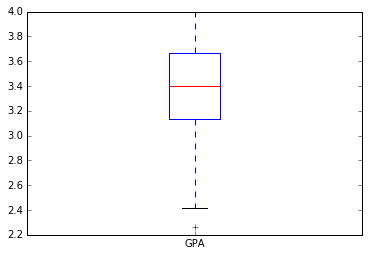

In [8]:
#boxplot 2 
plt.boxplot([df_raw.gpa])
plt.xticks([1],['GPA'])
plt.show()

#### Question 7. What do these plots show?

Answer: Both GRE and GPA have symmertic distribution with two outliers.

#### Question 8.  If our model had an assumption of a symmetric distribution would we meet that requirement? 

Answer: Yes!

#### Question 9: Add dummy variables for GRE scores. Top 10% are considered very high. next 25% of GRE scores are considered high, next 50% are considered medium and lowest 15% are considered Low. 

In [9]:
df_raw['GRE_Category'] = 'Very_high'
high_mask = ((df_raw['gre'] <= df_raw['gre'].quantile(0.9)) & 
             (df_raw['gre'] >  df_raw['gre'].quantile(.65))) 

medium_mask = ((df_raw['gre'] <= df_raw['gre'].quantile(0.65)) & 
               (df_raw['gre'] >  df_raw['gre'].quantile(.15)))

low_mask   =  (df_raw['gre'] <= df_raw['gre'].quantile(0.15)) 

df_raw.loc[high_mask, 'GRE_Category'] = 'High'
df_raw.loc[medium_mask, 'GRE_Category'] = 'Medium'
df_raw.loc[low_mask, 'GRE_Category'] = 'Low'

Dummy_GRE = pd.get_dummies(df_raw.GRE_Category)
del Dummy_GRE['Low']

df_raw = pd.concat([df_raw, Dummy_GRE],axis = 1)


df_raw.head()

,admit,gre,gpa,prestige,GRE_Category,High,Medium,Very_high
0,0,380,3.61,3,Low,0,0,0
1,1,660,3.67,3,High,1,0,0
2,1,800,4.00,1,Very_high,0,0,1
3,1,640,3.19,4,Medium,0,1,0
4,0,520,2.93,4,Medium,0,1,0


#### By a scatterplot explore the association between GRE based on GPA. For each observation, color according to perstige. 

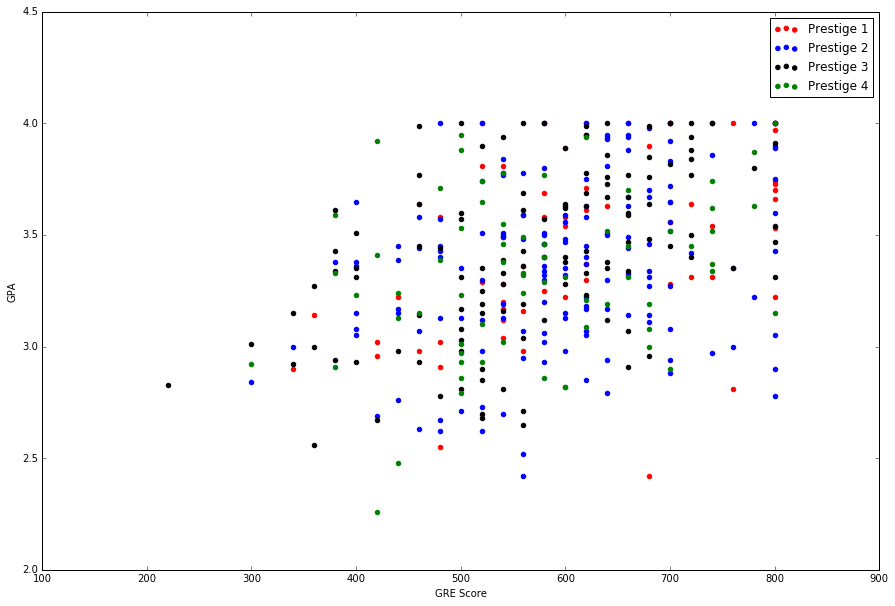

In [10]:
plt.figure(figsize=(15,10))

plt.scatter(df_raw.gre[df_raw.prestige == 1], 
            df_raw.gpa[df_raw.prestige == 1], 
            color = 'r',
            label = "Prestige 1"
            )

plt.scatter(df_raw.gre[df_raw.prestige == 2], 
            df_raw.gpa[df_raw.prestige == 2], 
            color = 'b',
            label = "Prestige 2")

plt.scatter(df_raw.gre[df_raw.prestige == 3], 
            df_raw.gpa[df_raw.prestige == 3],
            color = 'k',
            label = "Prestige 3")

plt.scatter(df_raw.gre[df_raw.prestige == 4], 
            df_raw.gpa[df_raw.prestige == 4], 
            color = 'g',
            label = "Prestige 4")

plt.xlabel('GRE Score')
plt.ylabel('GPA')
plt.legend()
plt.show()